In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # 0 = all messages are logged (default), 1 = INFO messages are not printed, 2 = INFO and WARNING messages are not printed, 3 = INFO, WARNING, and ERROR messages are not printed
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
from tqdm import tqdm

d:\GitTest\Введение в нейронные сети\wls\Introduction-to-HC\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# Функция для визуализации сгенерированных изображений
def visualize_generated_images(generator, random_dim, examples=16, figsize=(10, 10)):
    generated_images = generator.predict(generate_random_data(examples, random_dim))
    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(figsize=figsize)
    for i in range(examples):
        axs.imshow(generated_images[i])
        axs.axis("off")
    plt.show()


# Функция для сохранения модели
def save_model(model, filename):
    model.save(filename)


# Функция для загрузки модели
def load_generator(filename):
    return load_model(filename)


# Загрузка данных Oxford-IIIT Pet
dataset, info = tfds.load("oxford_iiit_pet", split="train", with_info=True)

# Размер случайного вектора, из которого генерируются изображения
random_dim = 100


# Преобразование размера изображений
def preprocess_image(sample):
    image = sample["image"]
    image = tf.image.resize(image, (64, 64))
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    return image


# Преобразование и подготовка датасета
dataset = dataset.map(preprocess_image)

# Размеры изображений
img_size = (64, 64, 3)


# Создание генератора
def build_generator(random_dim):
    model = Sequential()
    model.add(Dense(256 * 8 * 8, input_shape=(random_dim,)))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((8, 8, 256)))
    model.add(Conv2DTranspose(128, 4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, 4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, 4, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(3, 5, padding="same", activation="tanh"))
    return model


# Создание дискриминатора
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, 5, strides=2, padding="same", input_shape=img_size))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(128, 5, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(256, 5, strides=2, padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    return model


# Создание GAN
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


# Генерация случайных шумов
def generate_random_data(size, random_dim):
    return np.random.normal(0, 1, size=[size, random_dim])


# Создание и компиляция моделей
generator = build_generator(random_dim)
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
gan.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

Epoch 50/10000, Discriminator Loss: 0.8762337267398834, GAN Loss: 0.43825939297676086
Epoch 100/10000, Discriminator Loss: 0.9232375919818878, GAN Loss: 0.5119494795799255
Epoch 150/10000, Discriminator Loss: 0.7442621290683746, GAN Loss: 0.4925069808959961
Epoch 200/10000, Discriminator Loss: 0.6413218677043915, GAN Loss: 0.5600725412368774
Epoch 250/10000, Discriminator Loss: 0.5730243399739265, GAN Loss: 0.6131836175918579
Epoch 300/10000, Discriminator Loss: 0.5155542246066034, GAN Loss: 0.648430585861206
Epoch 350/10000, Discriminator Loss: 0.45352272409945726, GAN Loss: 0.7356293797492981
Epoch 400/10000, Discriminator Loss: 0.4168959679082036, GAN Loss: 0.6998926401138306
Epoch 450/10000, Discriminator Loss: 0.40858592215226963, GAN Loss: 0.6773786544799805
1/1 [==============================] - 0s 345ms/step


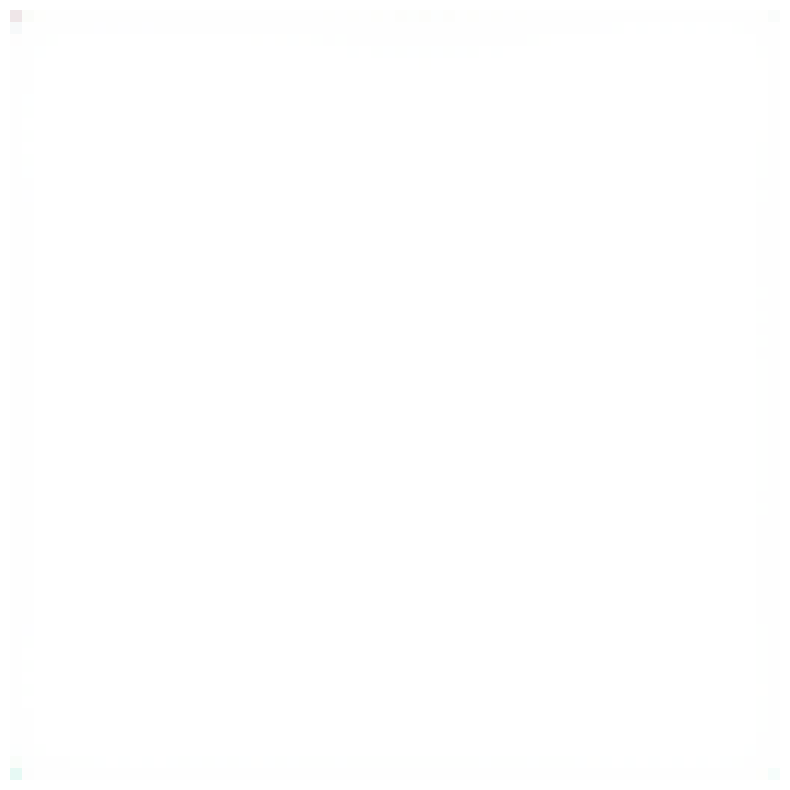

Epoch 500/10000, Discriminator Loss: 0.38530866173096, GAN Loss: 0.6918148994445801
Epoch 550/10000, Discriminator Loss: 0.3839222735259682, GAN Loss: 0.7272734642028809
Epoch 600/10000, Discriminator Loss: 0.37300469854380935, GAN Loss: 0.7716599106788635
Epoch 650/10000, Discriminator Loss: 0.39603639766573906, GAN Loss: 0.7321246862411499
Epoch 700/10000, Discriminator Loss: 0.37888974393717945, GAN Loss: 0.8321283459663391
Epoch 750/10000, Discriminator Loss: 0.9525229036808014, GAN Loss: 1.9501193761825562
Epoch 800/10000, Discriminator Loss: 0.5731147527694702, GAN Loss: 1.0418137311935425
Epoch 850/10000, Discriminator Loss: 0.6083404272794724, GAN Loss: 0.7394219040870667
Epoch 900/10000, Discriminator Loss: 0.7175253331661224, GAN Loss: 1.0512773990631104
Epoch 950/10000, Discriminator Loss: 0.6539928838610649, GAN Loss: 0.7849645614624023
1/1 [==============================] - 0s 196ms/step


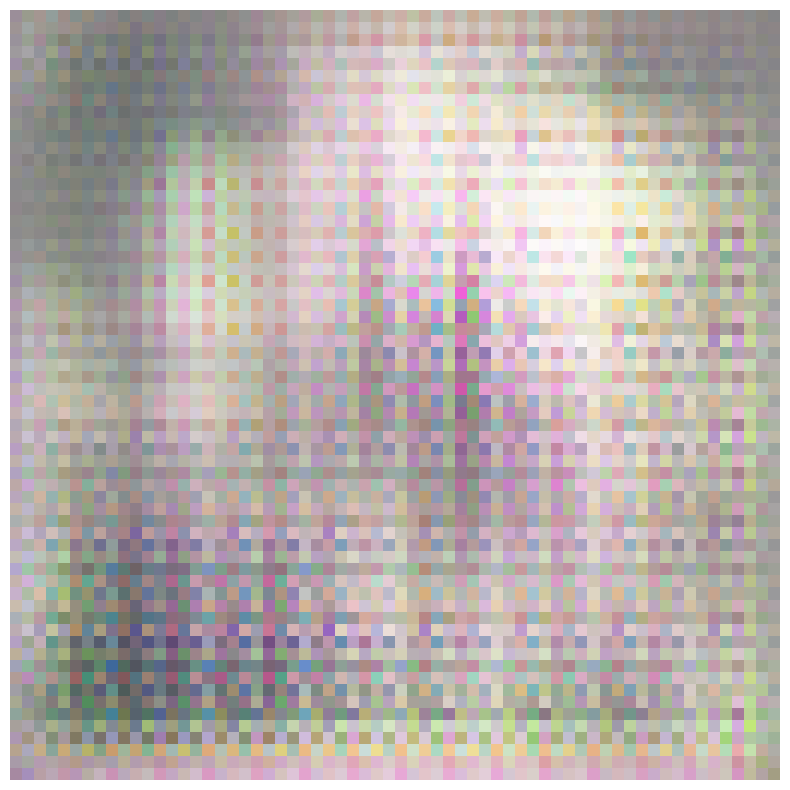

Epoch 1000/10000, Discriminator Loss: 0.7252392321825027, GAN Loss: 1.2798954248428345
Epoch 1050/10000, Discriminator Loss: 0.7061474025249481, GAN Loss: 1.141563892364502
Epoch 1100/10000, Discriminator Loss: 0.7301870211958885, GAN Loss: 0.9518628120422363
Epoch 1150/10000, Discriminator Loss: 0.8623861446976662, GAN Loss: 1.1957488059997559
Epoch 1200/10000, Discriminator Loss: 0.6521434187889099, GAN Loss: 1.2287447452545166
Epoch 1250/10000, Discriminator Loss: 0.559821829199791, GAN Loss: 1.581923484802246
Epoch 1300/10000, Discriminator Loss: 0.5139386458322406, GAN Loss: 1.1958560943603516
Epoch 1350/10000, Discriminator Loss: 0.583102488424629, GAN Loss: 1.6096303462982178
Epoch 1400/10000, Discriminator Loss: 0.3805918963626027, GAN Loss: 1.741708755493164
Epoch 1450/10000, Discriminator Loss: 0.5467558986274526, GAN Loss: 1.7216272354125977
1/1 [==============================] - 0s 177ms/step


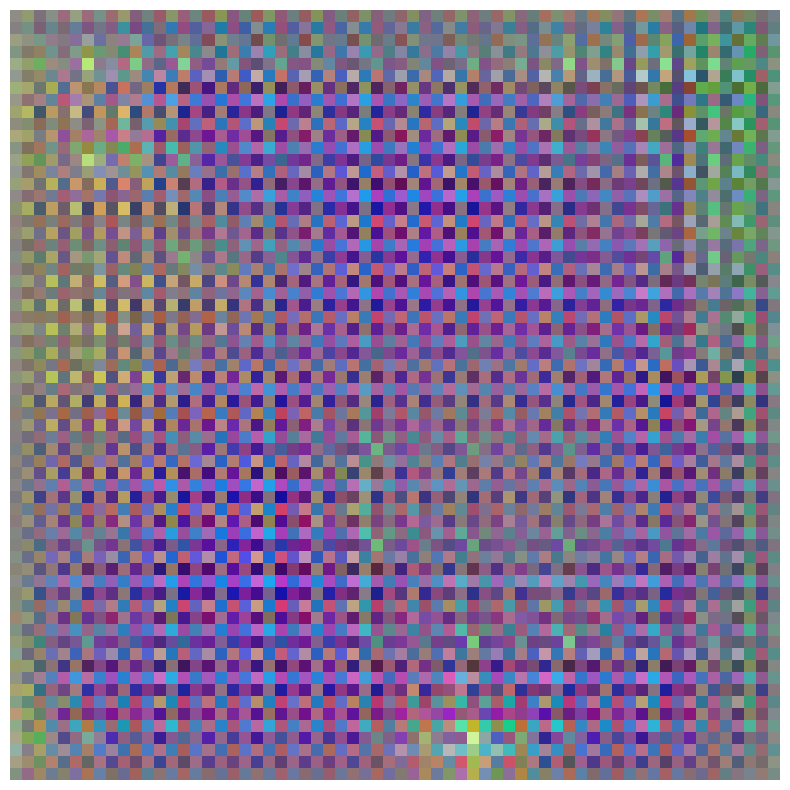

Epoch 1500/10000, Discriminator Loss: 0.3093798514455557, GAN Loss: 2.897718667984009
Epoch 1550/10000, Discriminator Loss: 0.6278372220695019, GAN Loss: 2.112705707550049
Epoch 1600/10000, Discriminator Loss: 0.5501006972044706, GAN Loss: 2.012279510498047
Epoch 1650/10000, Discriminator Loss: 0.49287521466612816, GAN Loss: 1.7378525733947754
Epoch 1700/10000, Discriminator Loss: 0.3610413586720824, GAN Loss: 1.931471824645996
Epoch 1750/10000, Discriminator Loss: 0.6948035552632064, GAN Loss: 3.021097183227539
Epoch 1800/10000, Discriminator Loss: 0.5051903845742345, GAN Loss: 1.957140326499939
Epoch 1850/10000, Discriminator Loss: 0.28148238686844707, GAN Loss: 2.653244733810425
Epoch 1900/10000, Discriminator Loss: 0.8264917661654181, GAN Loss: 1.6588661670684814
Epoch 1950/10000, Discriminator Loss: 0.054295540184515545, GAN Loss: 3.0810189247131348
1/1 [==============================] - 0s 172ms/step


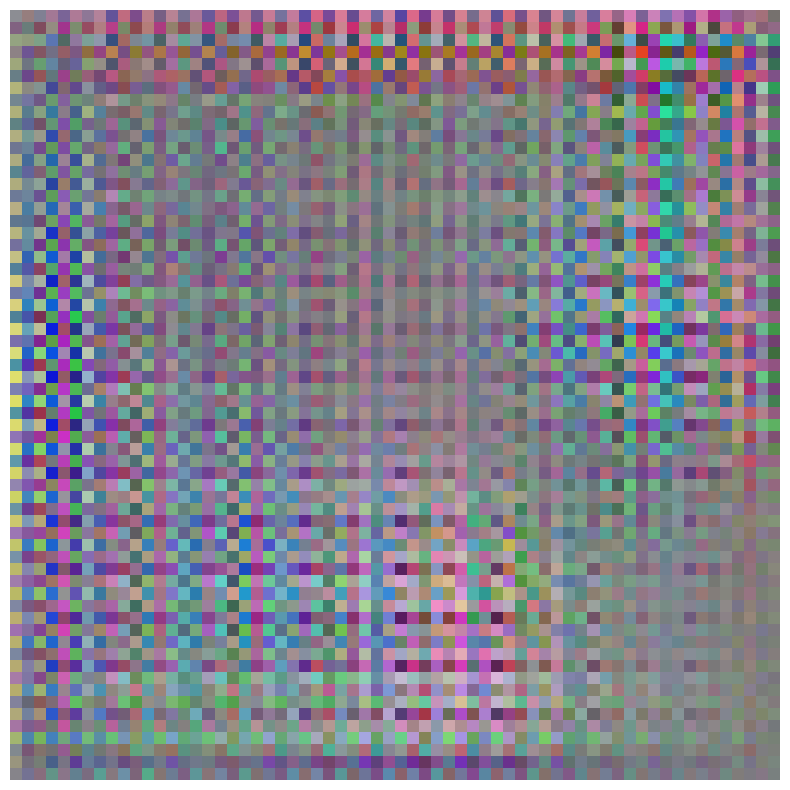

Epoch 2000/10000, Discriminator Loss: 0.2789319674484432, GAN Loss: 2.4047036170959473
Epoch 2050/10000, Discriminator Loss: 0.36644405092374654, GAN Loss: 2.3124213218688965
Epoch 2100/10000, Discriminator Loss: 0.22503067628713325, GAN Loss: 2.4789862632751465
Epoch 2150/10000, Discriminator Loss: 0.5064559890888631, GAN Loss: 2.7950634956359863
Epoch 2200/10000, Discriminator Loss: 0.34770769136957824, GAN Loss: 4.192243576049805
Epoch 2250/10000, Discriminator Loss: 0.6585844269793597, GAN Loss: 3.0775086879730225
Epoch 2300/10000, Discriminator Loss: 0.704804646782577, GAN Loss: 6.050436973571777
Epoch 2350/10000, Discriminator Loss: 0.3266674148329969, GAN Loss: 7.405055046081543
Epoch 2400/10000, Discriminator Loss: 1.1607548619911086, GAN Loss: 11.278114318847656
Epoch 2450/10000, Discriminator Loss: 1.3243088589515537, GAN Loss: 11.499176025390625
1/1 [==============================] - 0s 165ms/step


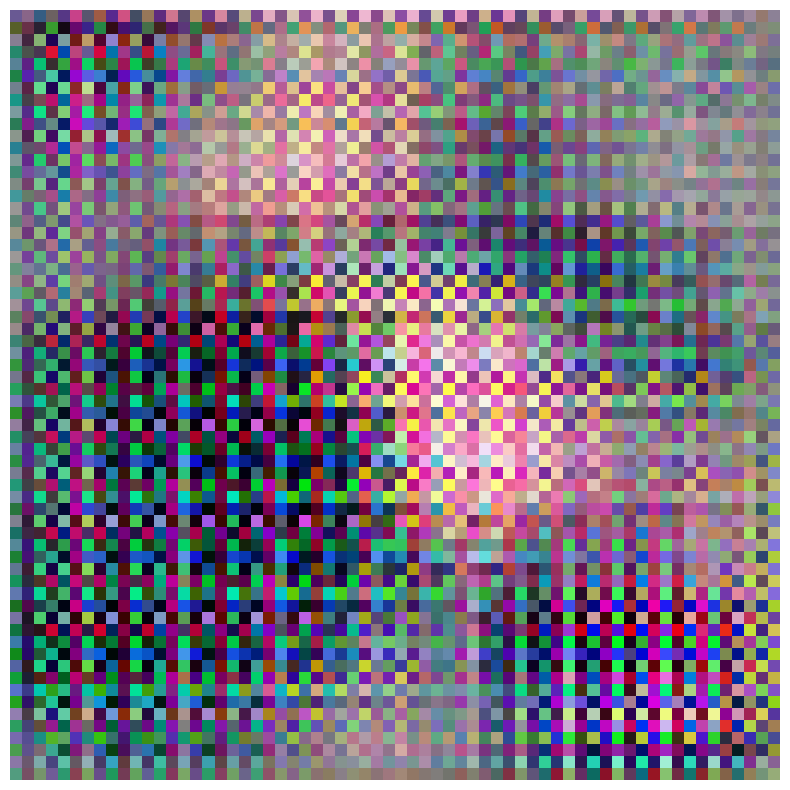

Epoch 2500/10000, Discriminator Loss: 0.7284665876068175, GAN Loss: 10.073923110961914
Epoch 2550/10000, Discriminator Loss: 2.654586613839456, GAN Loss: 6.86613130569458
Epoch 2600/10000, Discriminator Loss: 1.2776282094419003, GAN Loss: 5.209865570068359
Epoch 2650/10000, Discriminator Loss: 1.2203013105778417, GAN Loss: 3.2279810905456543
Epoch 2700/10000, Discriminator Loss: 0.5642170049250126, GAN Loss: 3.829699993133545
Epoch 2750/10000, Discriminator Loss: 0.732189228059724, GAN Loss: 4.310466766357422
Epoch 2800/10000, Discriminator Loss: 0.36179440166961285, GAN Loss: 2.746852397918701
Epoch 2850/10000, Discriminator Loss: 1.0458793865982443, GAN Loss: 12.462453842163086
Epoch 2900/10000, Discriminator Loss: 0.19957031589001417, GAN Loss: 10.282047271728516
Epoch 2950/10000, Discriminator Loss: 0.3158261878415942, GAN Loss: 14.319549560546875
1/1 [==============================] - 0s 169ms/step


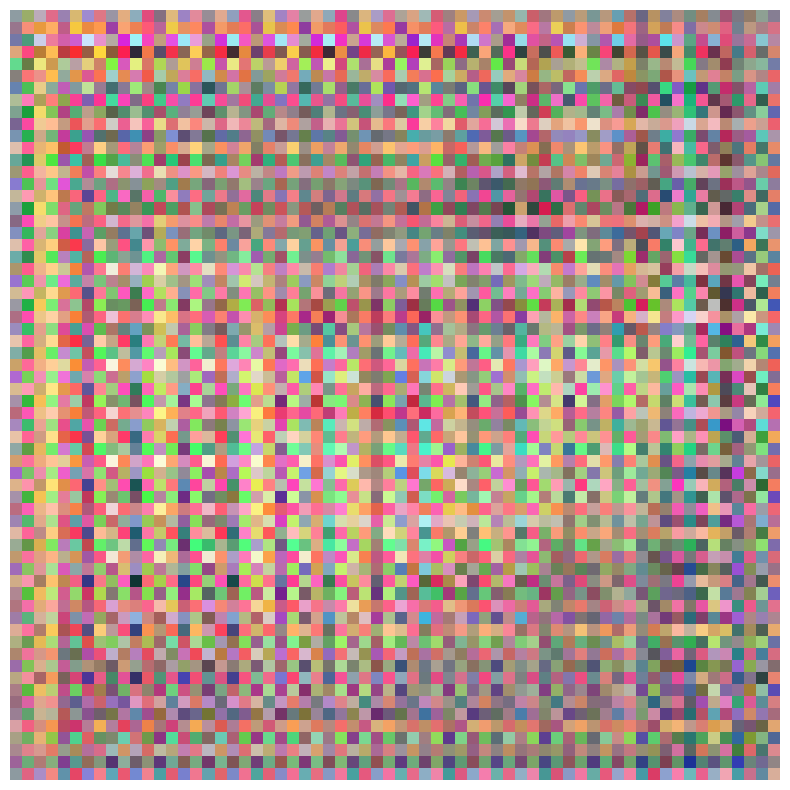

Epoch 3000/10000, Discriminator Loss: 1.5248910440132022, GAN Loss: 20.866960525512695
Epoch 3050/10000, Discriminator Loss: 3.6561781306227203, GAN Loss: 22.22072982788086
Epoch 3100/10000, Discriminator Loss: 4.548460602760315, GAN Loss: 17.591064453125
Epoch 3150/10000, Discriminator Loss: 3.7704377963673323, GAN Loss: 15.102785110473633
Epoch 3200/10000, Discriminator Loss: 2.6766680292785168, GAN Loss: 6.042000770568848
Epoch 3250/10000, Discriminator Loss: 2.546677751466632, GAN Loss: 11.142210006713867
Epoch 3300/10000, Discriminator Loss: 3.0316482465714216, GAN Loss: 6.7330732345581055
Epoch 3350/10000, Discriminator Loss: 2.8168539851903915, GAN Loss: 7.180816650390625
Epoch 3400/10000, Discriminator Loss: 1.8415474298923868, GAN Loss: 5.375619888305664
Epoch 3450/10000, Discriminator Loss: 0.8220025058835745, GAN Loss: 8.792608261108398
1/1 [==============================] - 0s 163ms/step


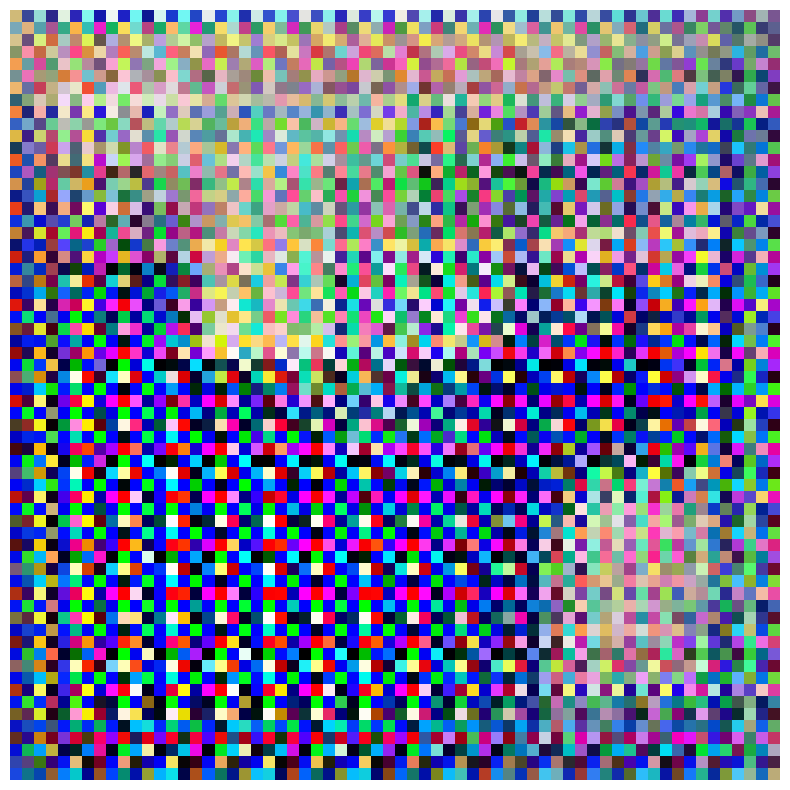

Epoch 3500/10000, Discriminator Loss: 1.4122355235740542, GAN Loss: 7.809455394744873
Epoch 3550/10000, Discriminator Loss: 2.098959756702243, GAN Loss: 5.788987636566162
Epoch 3600/10000, Discriminator Loss: 2.2826981330290437, GAN Loss: 7.592377662658691
Epoch 3650/10000, Discriminator Loss: 1.1329465210437775, GAN Loss: 9.54598617553711
Epoch 3700/10000, Discriminator Loss: 1.7920633823841854, GAN Loss: 5.5998334884643555
Epoch 3750/10000, Discriminator Loss: 1.4081838093698025, GAN Loss: 9.522031784057617
Epoch 3800/10000, Discriminator Loss: 1.5121344402432442, GAN Loss: 9.150138854980469
Epoch 3850/10000, Discriminator Loss: 1.9173993468284607, GAN Loss: 5.898870468139648
Epoch 3900/10000, Discriminator Loss: 2.335436198380421, GAN Loss: 10.41340446472168
Epoch 3950/10000, Discriminator Loss: 1.8866961598396301, GAN Loss: 10.584944725036621
1/1 [==============================] - 0s 163ms/step


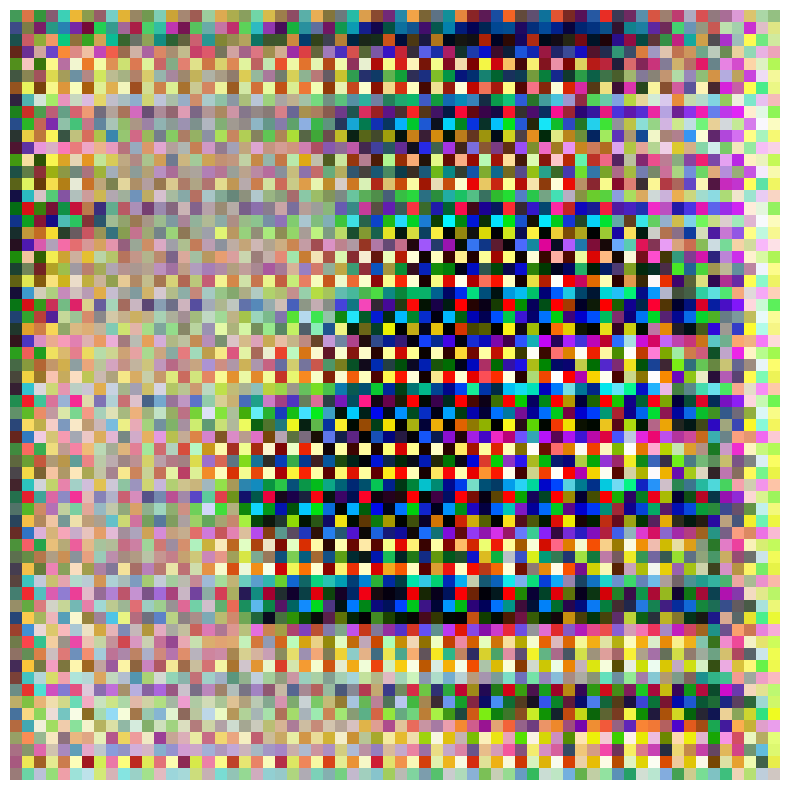

Epoch 4000/10000, Discriminator Loss: 4.729465008556496, GAN Loss: 18.64887809753418
Epoch 4050/10000, Discriminator Loss: 6.20521205663681, GAN Loss: 33.04795837402344
Epoch 4100/10000, Discriminator Loss: 7.481150716543198, GAN Loss: 35.79450607299805
Epoch 4150/10000, Discriminator Loss: 5.662825461477041, GAN Loss: 26.836109161376953
Epoch 4200/10000, Discriminator Loss: 6.224758855998516, GAN Loss: 19.888593673706055
Epoch 4250/10000, Discriminator Loss: 5.012210488319397, GAN Loss: 22.496631622314453
Epoch 4300/10000, Discriminator Loss: 3.5546038299798965, GAN Loss: 17.225906372070312
Epoch 4350/10000, Discriminator Loss: 4.189066372811794, GAN Loss: 13.092287063598633
Epoch 4400/10000, Discriminator Loss: 3.1761571019887924, GAN Loss: 17.190505981445312
Epoch 4450/10000, Discriminator Loss: 5.189635366201401, GAN Loss: 9.521236419677734
1/1 [==============================] - 0s 163ms/step


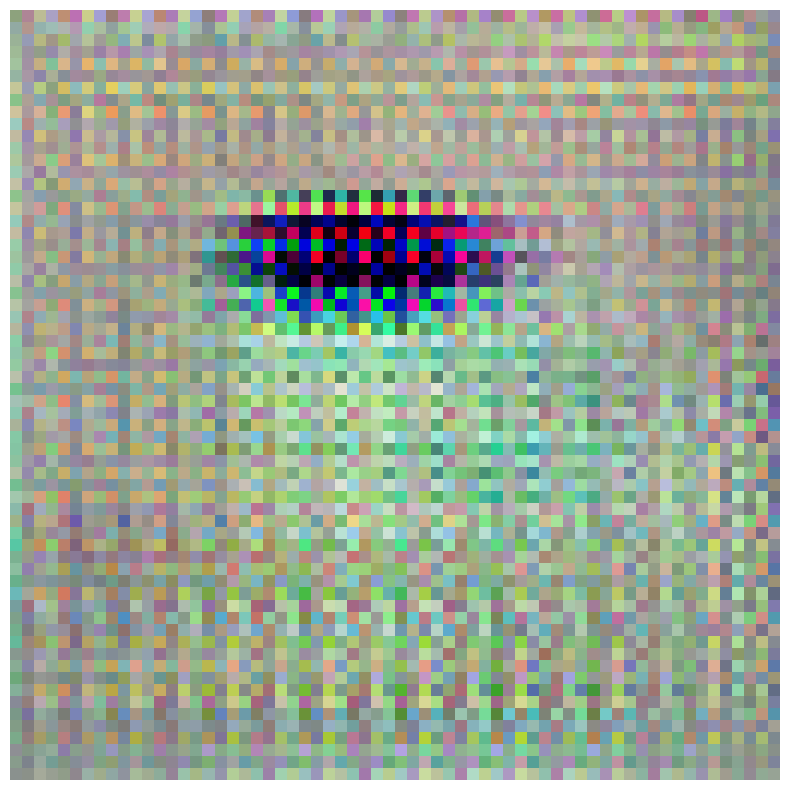

Epoch 4500/10000, Discriminator Loss: 2.4869473837316036, GAN Loss: 14.598069190979004
Epoch 4550/10000, Discriminator Loss: 3.2771301404573023, GAN Loss: 13.806833267211914
Epoch 4600/10000, Discriminator Loss: 4.462304770946503, GAN Loss: 15.17355728149414
Epoch 4650/10000, Discriminator Loss: 6.568489809462335, GAN Loss: 18.186288833618164
Epoch 4700/10000, Discriminator Loss: 5.817383989691734, GAN Loss: 20.22805404663086
Epoch 4750/10000, Discriminator Loss: 3.953991711139679, GAN Loss: 23.062143325805664
Epoch 4800/10000, Discriminator Loss: 4.471269026398659, GAN Loss: 21.436012268066406
Epoch 4850/10000, Discriminator Loss: 8.319551333785057, GAN Loss: 27.92396354675293
Epoch 4900/10000, Discriminator Loss: 8.667953431606293, GAN Loss: 33.707061767578125
Epoch 4950/10000, Discriminator Loss: 11.299557605641894, GAN Loss: 44.710723876953125
1/1 [==============================] - 0s 167ms/step


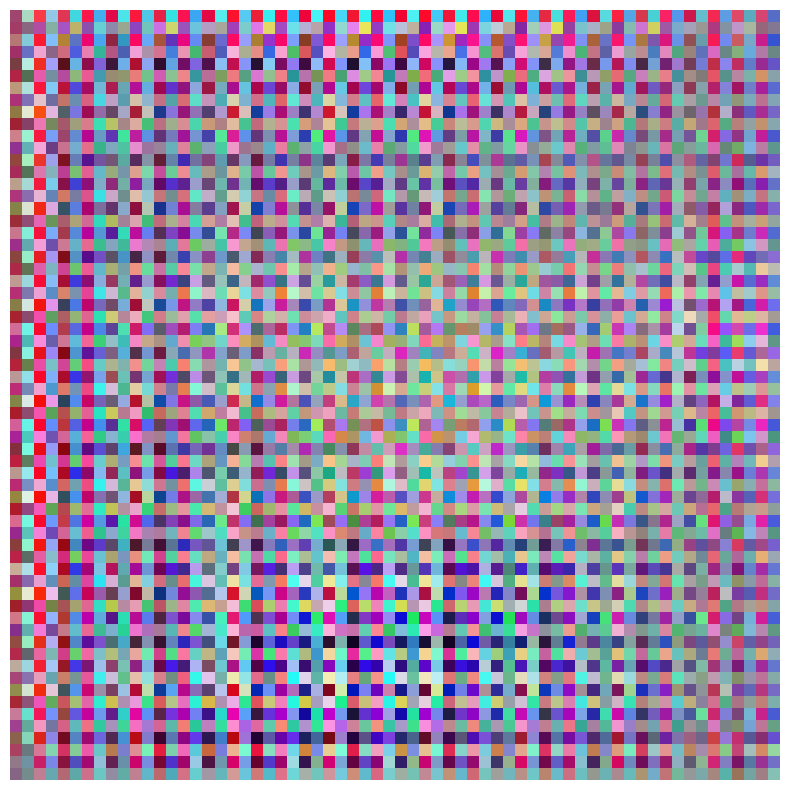

Epoch 5000/10000, Discriminator Loss: 8.20833970606327, GAN Loss: 47.47943115234375
Epoch 5050/10000, Discriminator Loss: 8.214043470507022, GAN Loss: 37.199745178222656
Epoch 5100/10000, Discriminator Loss: 5.934787273406982, GAN Loss: 45.216888427734375
Epoch 5150/10000, Discriminator Loss: 28.117731764912605, GAN Loss: 100.56834411621094
Epoch 5200/10000, Discriminator Loss: 11.20424509048462, GAN Loss: 56.1392936706543
Epoch 5250/10000, Discriminator Loss: 22.897210627794266, GAN Loss: 34.82518005371094
Epoch 5300/10000, Discriminator Loss: 21.625198125839233, GAN Loss: 60.09648895263672
Epoch 5350/10000, Discriminator Loss: 13.213016986846924, GAN Loss: 37.97863006591797
Epoch 5400/10000, Discriminator Loss: 20.689992398023605, GAN Loss: 40.39694595336914
Epoch 5450/10000, Discriminator Loss: 19.444968461990356, GAN Loss: 31.730560302734375
1/1 [==============================] - 0s 178ms/step


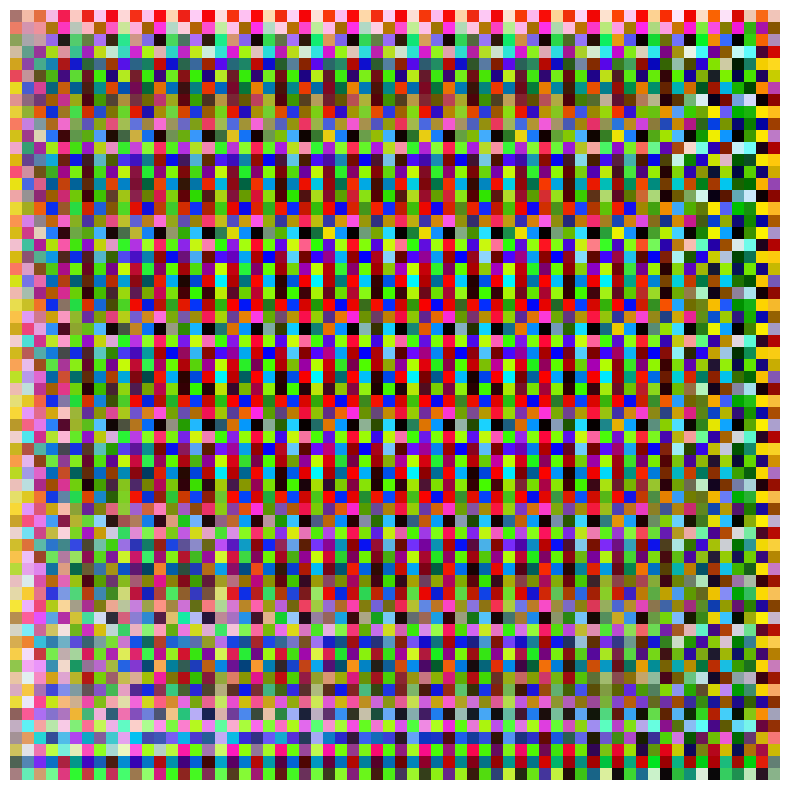

Epoch 5500/10000, Discriminator Loss: 21.305999875068665, GAN Loss: 45.343719482421875
Epoch 5550/10000, Discriminator Loss: 18.209163337945938, GAN Loss: 43.21678161621094
Epoch 5600/10000, Discriminator Loss: 16.7261565872991, GAN Loss: 56.065223693847656
Epoch 5650/10000, Discriminator Loss: 22.54934525489807, GAN Loss: 40.10913848876953
Epoch 5700/10000, Discriminator Loss: 11.880293369293213, GAN Loss: 67.53341674804688
Epoch 5750/10000, Discriminator Loss: 38.77868914604187, GAN Loss: 55.11076736450195
Epoch 5800/10000, Discriminator Loss: 20.444306135177612, GAN Loss: 31.617860794067383
Epoch 5850/10000, Discriminator Loss: 12.961068630218506, GAN Loss: 44.707122802734375
Epoch 5900/10000, Discriminator Loss: 29.209267258644104, GAN Loss: 41.409637451171875
Epoch 5950/10000, Discriminator Loss: 17.662573218345642, GAN Loss: 60.881961822509766
1/1 [==============================] - 0s 179ms/step


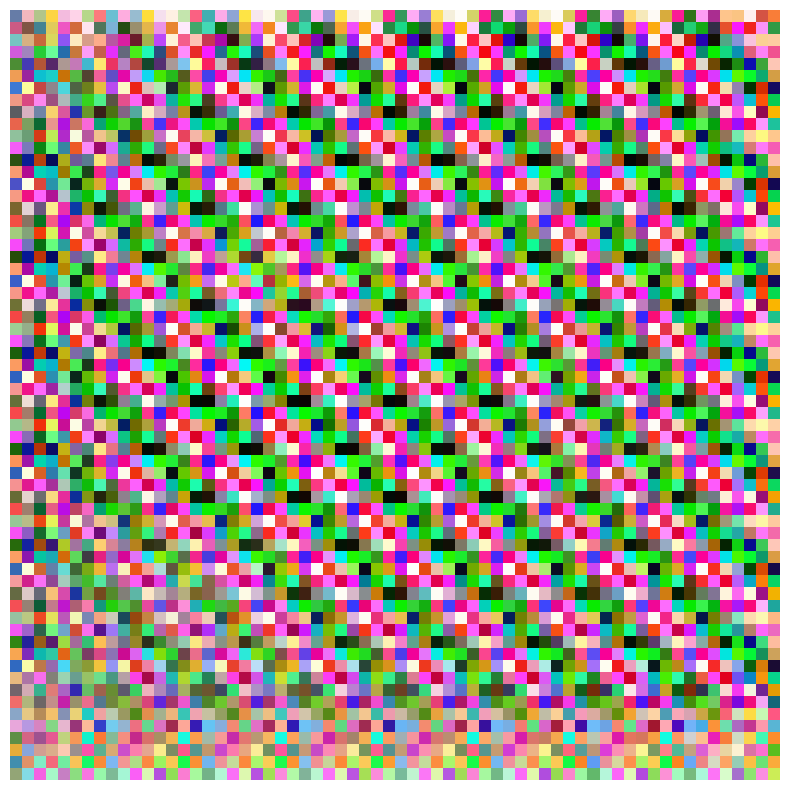

Epoch 6000/10000, Discriminator Loss: 17.466381072998242, GAN Loss: 48.370426177978516
Epoch 6050/10000, Discriminator Loss: 16.57899388577789, GAN Loss: 70.5848159790039
Epoch 6100/10000, Discriminator Loss: 17.028616522962693, GAN Loss: 78.3180160522461
Epoch 6150/10000, Discriminator Loss: 20.59867286682129, GAN Loss: 63.005401611328125
Epoch 6200/10000, Discriminator Loss: 13.399544715881353, GAN Loss: 69.23958587646484
Epoch 6250/10000, Discriminator Loss: 35.400421142578125, GAN Loss: 95.26158905029297
Epoch 6300/10000, Discriminator Loss: 23.58444905281067, GAN Loss: 58.94034194946289
Epoch 6350/10000, Discriminator Loss: 31.32781611367215, GAN Loss: 87.78845977783203
Epoch 6400/10000, Discriminator Loss: 29.426456451416016, GAN Loss: 84.84992980957031
Epoch 6450/10000, Discriminator Loss: 18.50538718700409, GAN Loss: 71.44039916992188
1/1 [==============================] - 0s 173ms/step


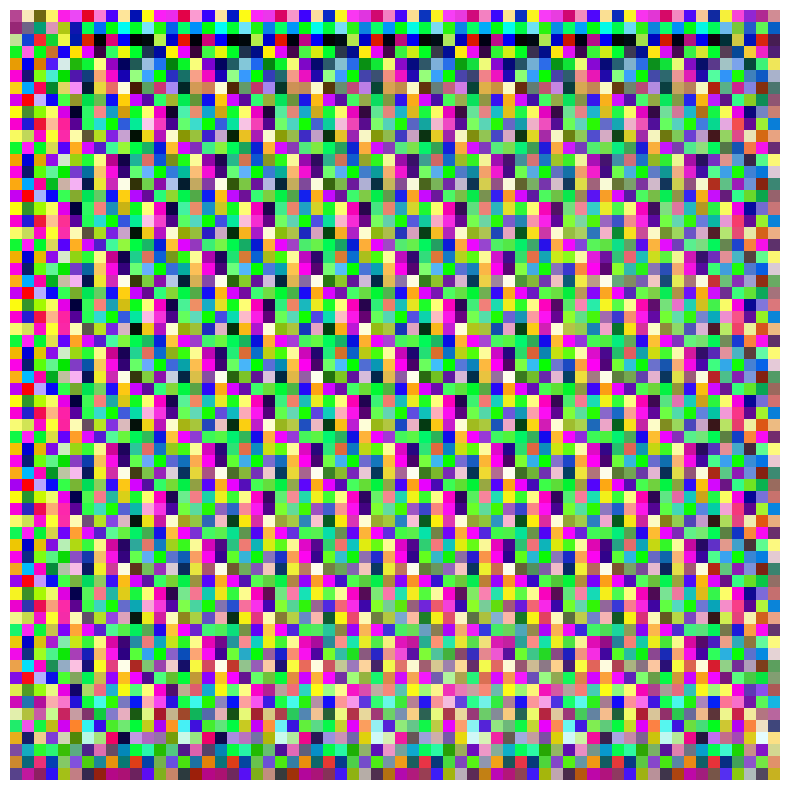

Epoch 6500/10000, Discriminator Loss: 25.578589610755444, GAN Loss: 105.05026245117188
Epoch 6550/10000, Discriminator Loss: 38.13359862565994, GAN Loss: 133.8920135498047
Epoch 6600/10000, Discriminator Loss: 39.38257122039795, GAN Loss: 132.71826171875
Epoch 6650/10000, Discriminator Loss: 53.23392707109451, GAN Loss: 124.20314025878906
Epoch 6700/10000, Discriminator Loss: 17.101974666118622, GAN Loss: 141.71372985839844
Epoch 6750/10000, Discriminator Loss: 49.01563948392868, GAN Loss: 89.99601745605469
Epoch 6800/10000, Discriminator Loss: 33.99366593360901, GAN Loss: 129.77981567382812
Epoch 6850/10000, Discriminator Loss: 31.236613273620605, GAN Loss: 129.9888153076172
Epoch 6900/10000, Discriminator Loss: 20.347935914993286, GAN Loss: 82.15342712402344
Epoch 6950/10000, Discriminator Loss: 43.0314524769783, GAN Loss: 97.6804428100586
1/1 [==============================] - 0s 163ms/step


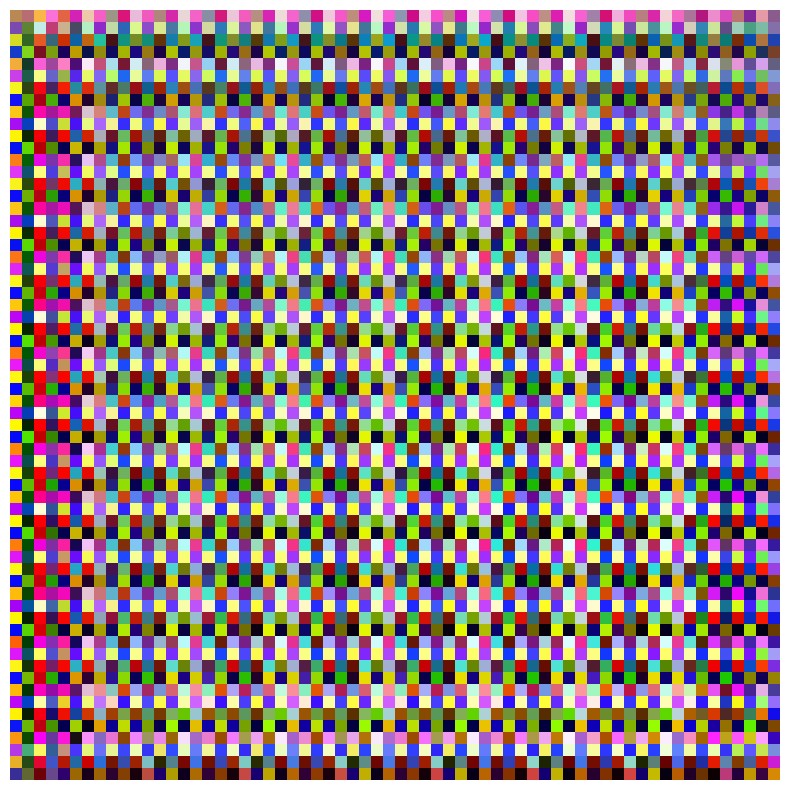

Epoch 7000/10000, Discriminator Loss: 40.0354540348053, GAN Loss: 145.2183837890625
Epoch 7050/10000, Discriminator Loss: 26.45093208295293, GAN Loss: 186.02783203125
Epoch 7100/10000, Discriminator Loss: 13.633084654808044, GAN Loss: 122.72213745117188
Epoch 7150/10000, Discriminator Loss: 53.835556507110596, GAN Loss: 143.39114379882812
Epoch 7200/10000, Discriminator Loss: 35.880763471126556, GAN Loss: 214.5243682861328
Epoch 7250/10000, Discriminator Loss: 39.62815570831299, GAN Loss: 131.21397399902344
Epoch 7300/10000, Discriminator Loss: 42.095636665821075, GAN Loss: 122.1616439819336
Epoch 7350/10000, Discriminator Loss: 72.75477755069733, GAN Loss: 158.1188507080078
Epoch 7400/10000, Discriminator Loss: 56.169010400772095, GAN Loss: 147.33819580078125
Epoch 7450/10000, Discriminator Loss: 30.98891830444336, GAN Loss: 171.25567626953125
1/1 [==============================] - 0s 191ms/step


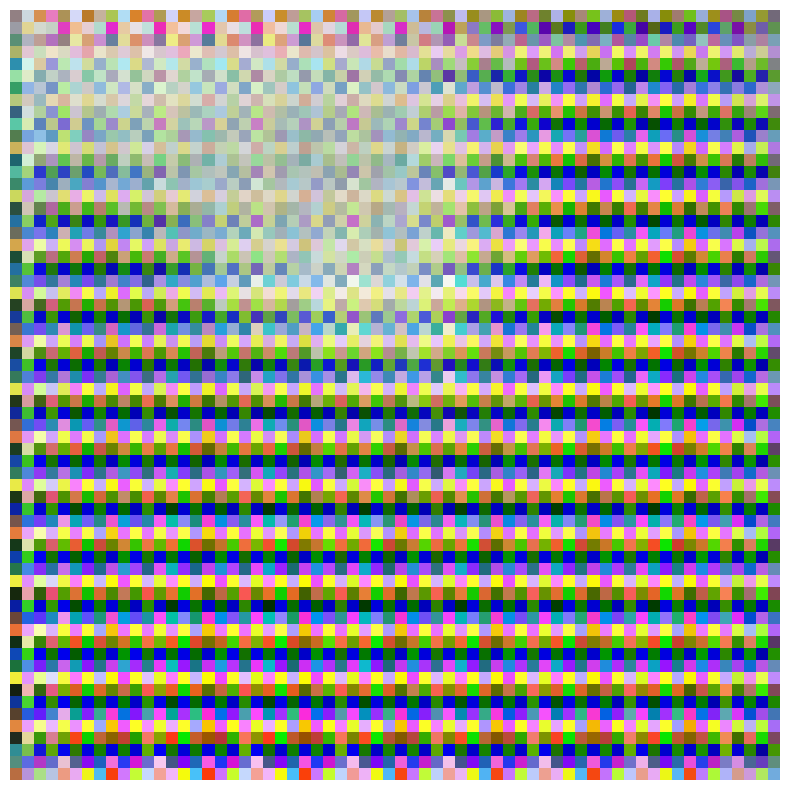

Epoch 7500/10000, Discriminator Loss: 43.53819155693054, GAN Loss: 211.71734619140625
Epoch 7550/10000, Discriminator Loss: 93.83504009246826, GAN Loss: 119.1738510131836
Epoch 7600/10000, Discriminator Loss: 90.58522140979767, GAN Loss: 163.65121459960938
Epoch 7650/10000, Discriminator Loss: 67.2678575515747, GAN Loss: 173.00196838378906
Epoch 7700/10000, Discriminator Loss: 77.23469305038452, GAN Loss: 204.82980346679688
Epoch 7750/10000, Discriminator Loss: 62.713979721069336, GAN Loss: 220.6690216064453
Epoch 7800/10000, Discriminator Loss: 90.29833173751831, GAN Loss: 214.88906860351562
Epoch 7850/10000, Discriminator Loss: 106.3491005897522, GAN Loss: 389.5186462402344
Epoch 7900/10000, Discriminator Loss: 136.67885494232178, GAN Loss: 141.03823852539062
Epoch 7950/10000, Discriminator Loss: 173.9769163131714, GAN Loss: 397.7195739746094
1/1 [==============================] - 0s 188ms/step


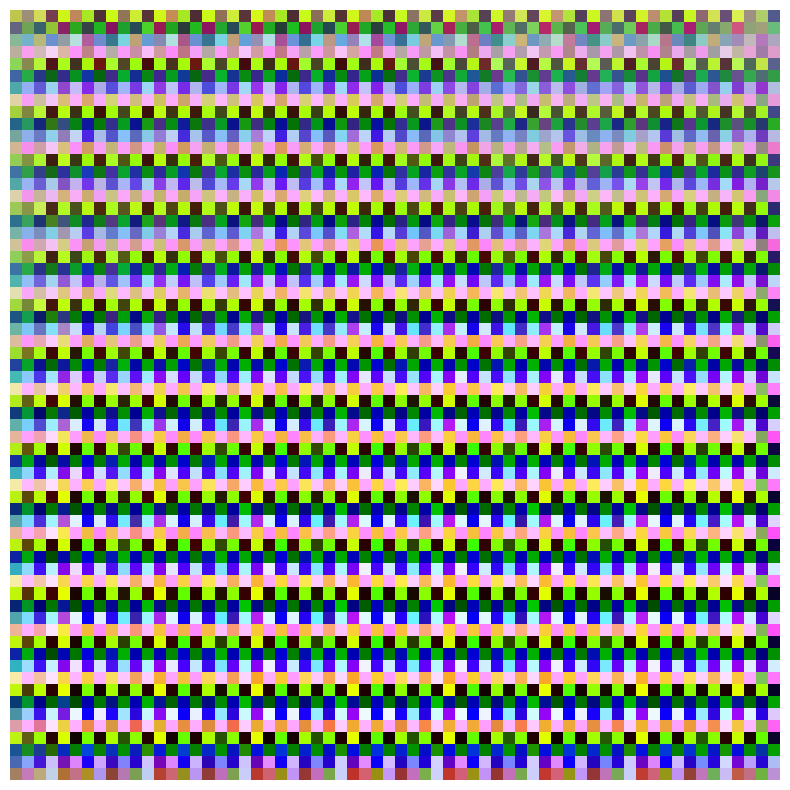

Epoch 8000/10000, Discriminator Loss: 82.34653425216675, GAN Loss: 310.61480712890625
Epoch 8050/10000, Discriminator Loss: 86.38837432861328, GAN Loss: 371.1822509765625
Epoch 8100/10000, Discriminator Loss: 94.09914541244507, GAN Loss: 281.514892578125
Epoch 8150/10000, Discriminator Loss: 142.44593620300293, GAN Loss: 269.118896484375
Epoch 8200/10000, Discriminator Loss: 142.2338399887085, GAN Loss: 565.5197143554688
Epoch 8250/10000, Discriminator Loss: 163.58864283561707, GAN Loss: 296.86419677734375
Epoch 8300/10000, Discriminator Loss: 72.4649748802185, GAN Loss: 405.7380065917969
Epoch 8350/10000, Discriminator Loss: 138.6661024093628, GAN Loss: 349.216552734375
Epoch 8400/10000, Discriminator Loss: 236.89986896514893, GAN Loss: 357.49066162109375
Epoch 8450/10000, Discriminator Loss: 168.80478286743164, GAN Loss: 487.4171447753906
1/1 [==============================] - 0s 209ms/step


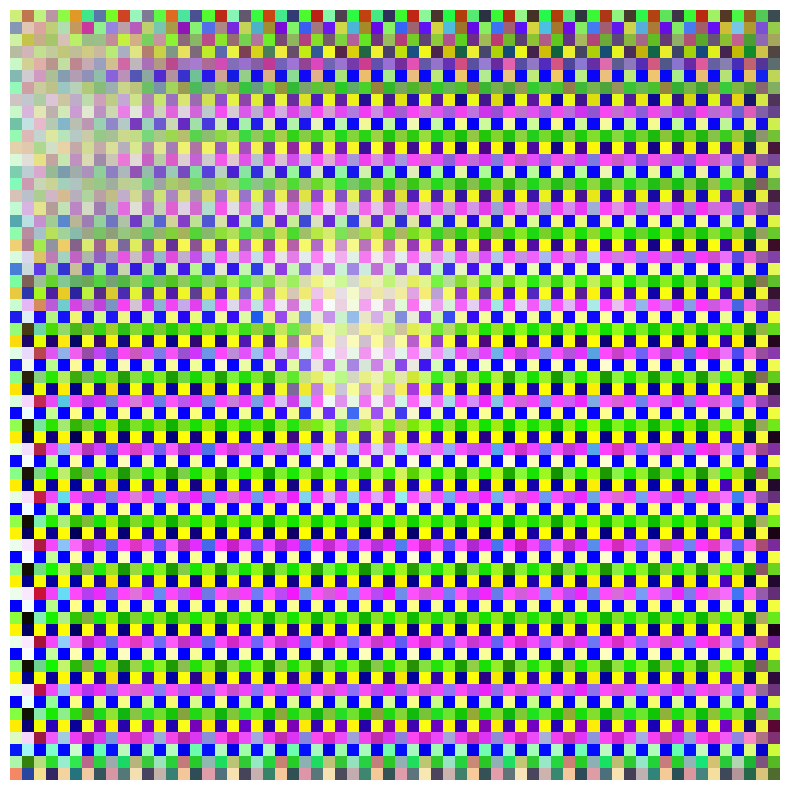

Epoch 8500/10000, Discriminator Loss: 185.95867156982422, GAN Loss: 339.34423828125
Epoch 8550/10000, Discriminator Loss: 144.23522567749023, GAN Loss: 453.5566711425781
Epoch 8600/10000, Discriminator Loss: 229.4160008430481, GAN Loss: 443.03387451171875
Epoch 8650/10000, Discriminator Loss: 151.39906692504883, GAN Loss: 327.42987060546875
Epoch 8700/10000, Discriminator Loss: 239.00890159606934, GAN Loss: 582.2086181640625
Epoch 8750/10000, Discriminator Loss: 222.5934658050537, GAN Loss: 568.986572265625
Epoch 8800/10000, Discriminator Loss: 234.8654956817627, GAN Loss: 506.05322265625
Epoch 8850/10000, Discriminator Loss: 186.40193581581116, GAN Loss: 562.1653442382812
Epoch 8900/10000, Discriminator Loss: 258.37464904785156, GAN Loss: 606.81689453125
Epoch 8950/10000, Discriminator Loss: 240.89155769348145, GAN Loss: 579.3973999023438
1/1 [==============================] - 0s 167ms/step


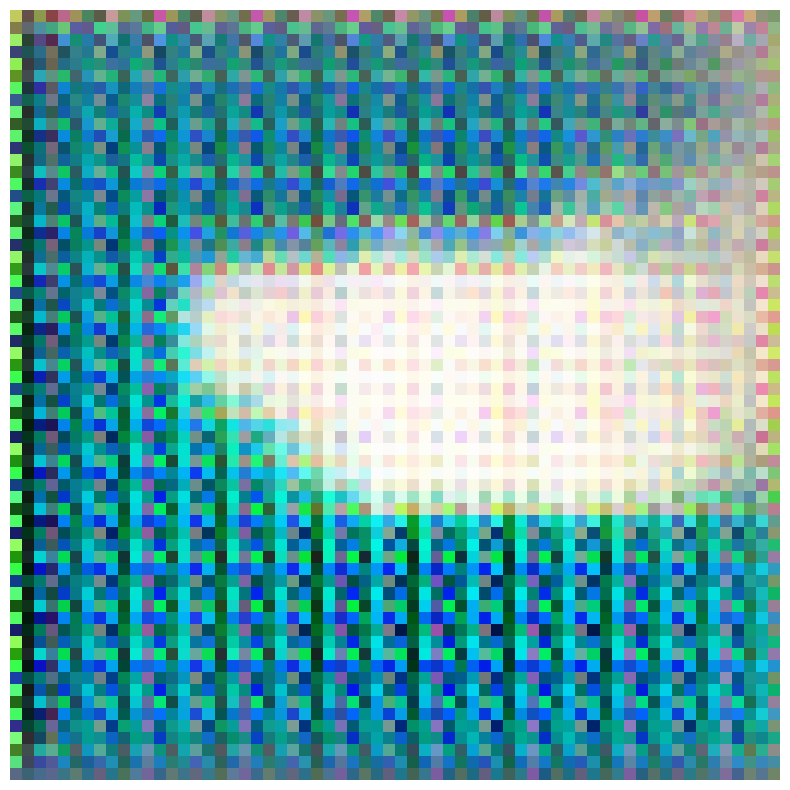

Epoch 9000/10000, Discriminator Loss: 267.9381904602051, GAN Loss: 544.0830078125
Epoch 9050/10000, Discriminator Loss: 294.119291305542, GAN Loss: 570.4005126953125
Epoch 9100/10000, Discriminator Loss: 334.0316438674927, GAN Loss: 459.9861755371094
Epoch 9150/10000, Discriminator Loss: 229.68105125427246, GAN Loss: 458.8770751953125
Epoch 9200/10000, Discriminator Loss: 311.2488832473755, GAN Loss: 442.8992919921875
Epoch 9250/10000, Discriminator Loss: 227.30847930908203, GAN Loss: 421.80963134765625
Epoch 9300/10000, Discriminator Loss: 256.15006256103516, GAN Loss: 450.388671875
Epoch 9350/10000, Discriminator Loss: 299.35143089294434, GAN Loss: 258.16748046875
Epoch 9400/10000, Discriminator Loss: 169.58798789978027, GAN Loss: 335.13970947265625
Epoch 9450/10000, Discriminator Loss: 278.87556076049805, GAN Loss: 330.0489501953125
1/1 [==============================] - 0s 176ms/step


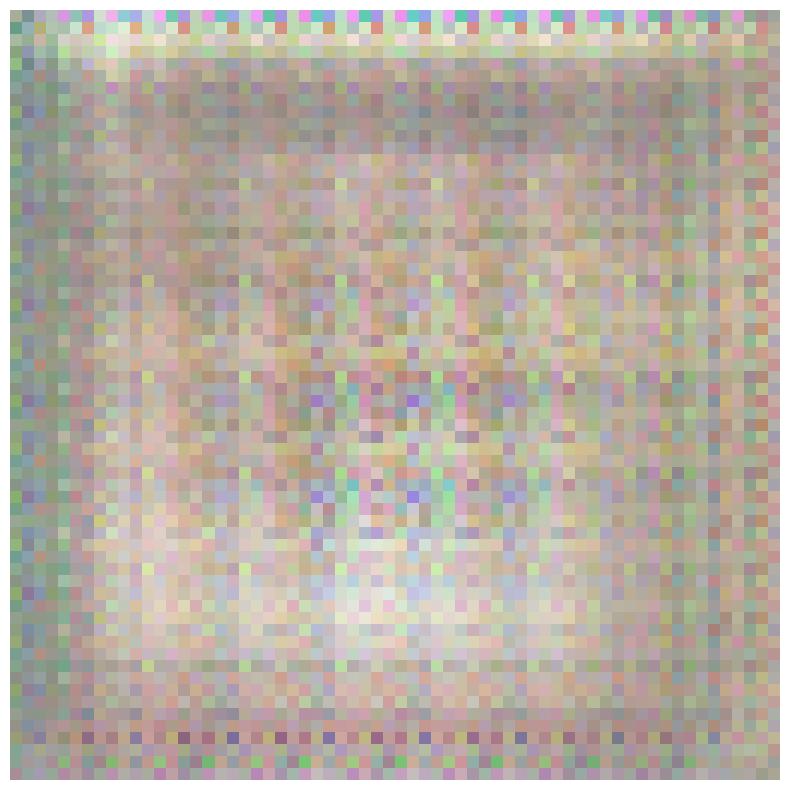

Epoch 9500/10000, Discriminator Loss: 249.78388214111328, GAN Loss: 110.0757827758789
Epoch 9550/10000, Discriminator Loss: 253.40961360931396, GAN Loss: 362.15283203125
Epoch 9600/10000, Discriminator Loss: 257.2658386230469, GAN Loss: 175.83602905273438
Epoch 9650/10000, Discriminator Loss: 180.65991973876953, GAN Loss: 159.13262939453125
Epoch 9700/10000, Discriminator Loss: 247.91891860961914, GAN Loss: 248.95687866210938
Epoch 9750/10000, Discriminator Loss: 182.21556854248047, GAN Loss: 243.14901733398438
Epoch 9800/10000, Discriminator Loss: 252.03929710388184, GAN Loss: 211.5457305908203
Epoch 9850/10000, Discriminator Loss: 232.11572551727295, GAN Loss: 269.41094970703125
Epoch 9900/10000, Discriminator Loss: 166.87554121017456, GAN Loss: 266.6905517578125
Epoch 9950/10000, Discriminator Loss: 230.01688957214355, GAN Loss: 400.2997131347656
1/1 [==============================] - 0s 264ms/step


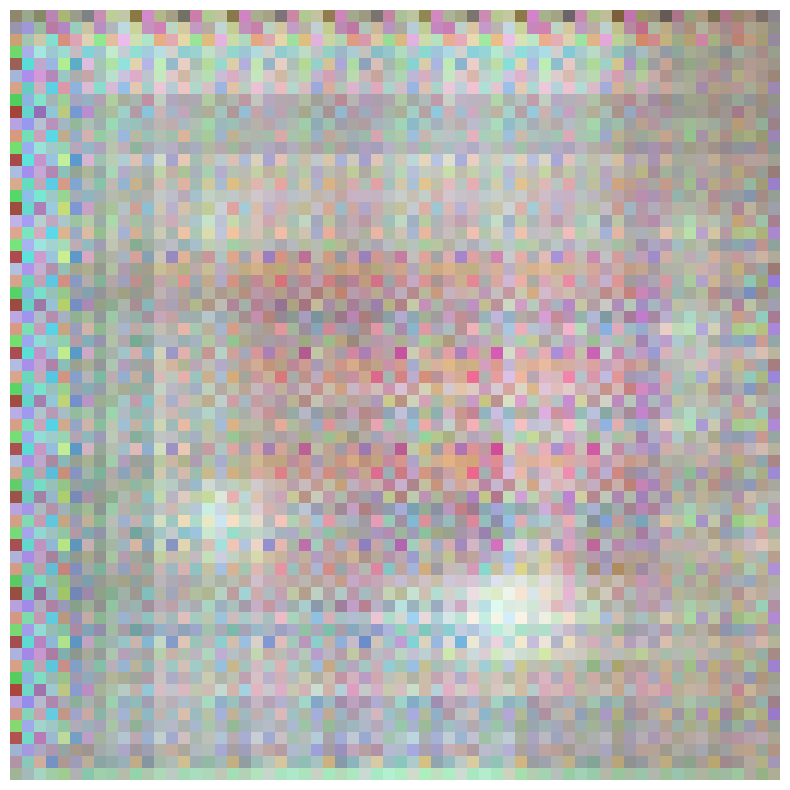

Epoch 10000/10000, Discriminator Loss: 308.0074825286865, GAN Loss: 409.15478515625


In [4]:
# Обучение GAN
epochs = 10000
batch_size = 32
visualize_every = 50
visualize_every_images = 500

d_losses, g_losses = [], []

# Прогресс-бар для эпох
for epoch in range(epochs):
    # Генерация данных
    real_images = next(iter(dataset.batch(batch_size)))

    # Обучение дискриминатора
    random_data = generate_random_data(batch_size, random_dim)
    generated_images = generator(random_data, training=False)

    # Создание меток для дискриминатора
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Обучение на реальных изображениях
    discriminator_loss_real = discriminator.train_on_batch(real_images, real_labels)
    # Обучение на сгенерированных изображениях
    discriminator_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

    # Обучение генератора
    random_data = generate_random_data(batch_size, random_dim)
    # Создание меток для генератора
    gan_labels = np.ones((batch_size, 1))
    gan_loss = gan.train_on_batch(random_data, gan_labels)

    d_losses.append(0.5 * (discriminator_loss_real + discriminator_loss_fake))
    g_losses.append(gan_loss)

    if (epoch + 1) % visualize_every_images == 0:
    # Визуализация результатов
        visualize_generated_images(generator, random_dim)

    # Выводим прогресс обучения
    if (epoch + 1) % visualize_every == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Discriminator Loss: {d_losses[-1]}, GAN Loss: {g_losses[-1]}")

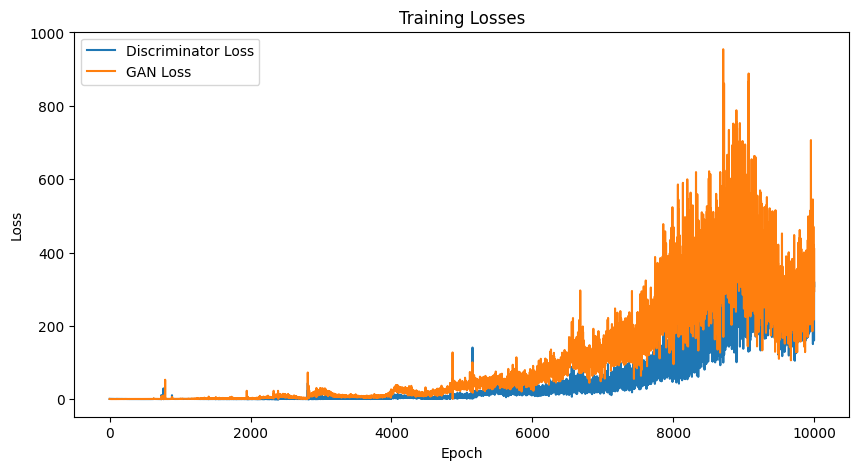

In [5]:
# Графики потерь
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="GAN Loss")
plt.legend()
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

d:\GitTest\Введение в нейронные сети\wls\Introduction-to-HC\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 393ms/step


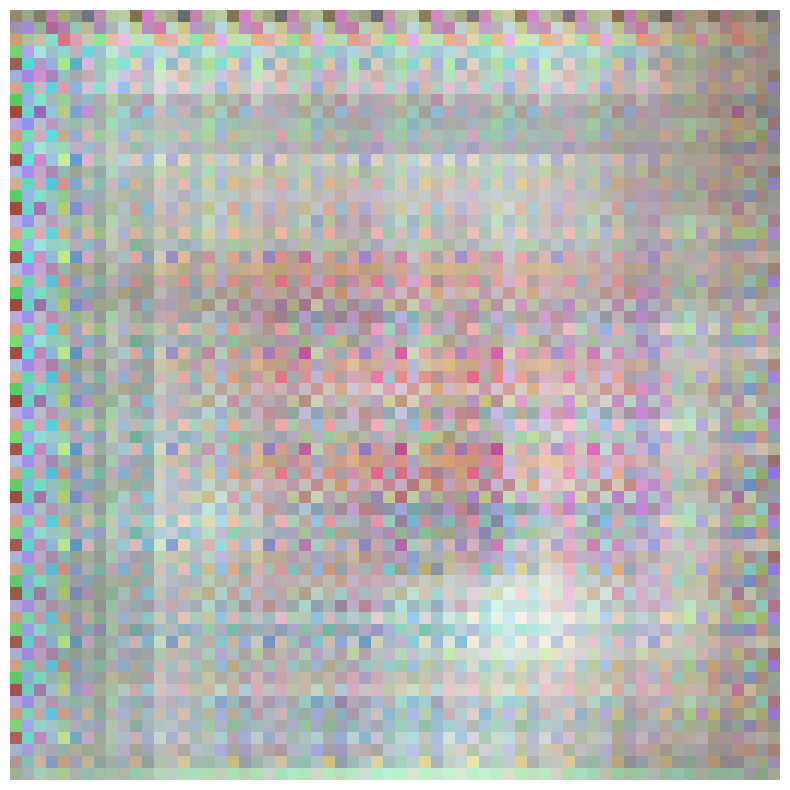

In [6]:
# Сохранение модели
save_model(generator, "generator_model_pet.h5")

# Пример использования сохраненной модели
loaded_generator = load_generator("generator_model_pet.h5")
visualize_generated_images(loaded_generator, random_dim)